<a href="https://colab.research.google.com/github/ColdCoffee21/Foundations-of-Data-Science/blob/master/Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Data Science/weather_by_cities.csv')

In [ ]:
df

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


In [ ]:
g = df.groupby('city') #groupby object
g

In [ ]:
g.first()

,day,temperature,windspeed,event
city,,,,
mumbai,1/1/2017,90,5,Sunny
new york,1/1/2017,32,6,Rain
paris,1/1/2017,45,20,Sunny


In [ ]:
g.get_group('mumbai') #returns dataframe

,day,temperature,windspeed,event
4,1/1/2017,90,5,Sunny
5,1/2/2017,85,12,Fog
6,1/3/2017,87,15,Fog
7,1/4/2017,92,5,Rain


In [ ]:
g.max()

,day,temperature,windspeed,event
city,,,,
mumbai,1/4/2017,92,15,Sunny
new york,1/4/2017,36,12,Sunny
paris,1/4/2017,54,20,Sunny


In [ ]:
g.mean()

,temperature,windspeed
city,,
mumbai,88.50,9.25
new york,32.25,8.00
paris,47.75,12.75


In [ ]:
g.describe()

temperature                         ... windspeed                   
               count   mean       std   min  ...       25%   50%    75%   max
city                                         ...                             
mumbai           4.0  88.50  3.109126  85.0  ...      5.00   8.5  12.75  15.0
new york         4.0  32.25  3.304038  28.0  ...      6.75   7.0   8.25  12.0
paris            4.0  47.75  5.315073  42.0  ...      9.50  11.5  14.75  20.0

[3 rows x 16 columns]

In [ ]:
g.size()

city
mumbai      4
new york    4
paris       4
dtype: int64

In [ ]:
g.count()

,day,temperature,windspeed,event
city,,,,
mumbai,4,4,4,4
new york,4,4,4,4
paris,4,4,4,4


In [ ]:
df = pd.DataFrame({
    'user_id':[1,2,1,3,3,],
    'content_id':[1,1,2,2,2],
    'tag':['cool','nice','clever','clever','not-bad']
})
df

,user_id,content_id,tag
0,1,1,cool
1,2,1,nice
2,1,2,clever
3,3,2,clever
4,3,2,not-bad


In [ ]:
df.groupby("content_id")["tag"].apply(lambda tags: ','.join(tags))

content_id
1                cool,nice
2    clever,clever,not-bad
Name: tag, dtype: object

In [ ]:
df.groupby('content_id')['user_id'].nunique()

content_id
1    2
2    2
Name: user_id, dtype: int64

In [ ]:
df.groupby('content_id')['user_id'].nunique().to_frame()

,user_id
content_id,
1,2
2,2


In [ ]:
df.groupby('content_id')['user_id'].nunique().to_frame().reset_index()

,content_id,user_id
0,1,2
1,2,2


In [ ]:
df.groupby('content_id')['user_id'].nunique().to_frame().reset_index(drop=True)

,user_id
0,2
1,2


In [ ]:
df = pd.DataFrame({
    'value':[20.45,22.89,32.12,111.22,33.22,100.00,99.99],
    'product':['table','chair','chair','mobile phone','table','mobile phone','table']
})

In [ ]:
df.groupby('product')['value'].sum().to_frame().reset_index()

,product,value
0,chair,55.01
1,mobile phone,211.22
2,table,153.66


In [ ]:
df.groupby('product')['value'].sum().to_frame().reset_index().sort_values(by='value')

,product,value
0,chair,55.01
2,table,153.66
1,mobile phone,211.22


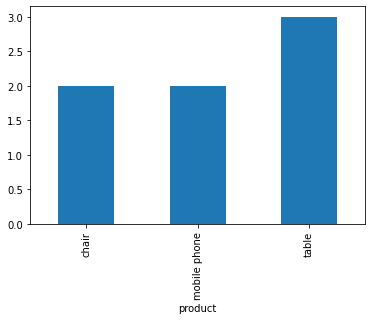

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
df.groupby('product').size().plot(kind='bar')
plt.show()

In [ ]:
df = pd.DataFrame({
    'value':[20.45,22.89,32.12,111.22,33.22,100.00,99.99],
    'product':['table','chair','chair','mobile phone','table','mobile phone','table'],
    'price':[100,200,300,400,500,600,700]
})

grouped_df = df.groupby('product').agg({'value': ['min', 'max', 'mean']})
grouped_df

value                 
                 min     max     mean
product                              
chair          22.89   32.12   27.505
mobile phone  100.00  111.22  105.610
table          20.45   99.99   51.220

In [ ]:
grouped_df = df.groupby('product').agg({'value': ['min', 'max'], 'price': ['mean']})
grouped_df

value               price
                 min     max        mean
product                                 
chair          22.89   32.12  250.000000
mobile phone  100.00  111.22  500.000000
table          20.45   99.99  433.333333

In [ ]:
grouped_df.columns.values

array([('value', 'min'), ('value', 'max'), ('price', 'mean')],
      dtype=object)

In [ ]:
grouped_df.columns = ['_'.join(col) for col in grouped_df.columns.values]
grouped_df = grouped_df.reset_index()
grouped_df

,product,value_min,value_max,price_mean
0,chair,22.89,32.12,250.000000
1,mobile phone,100.00,111.22,500.000000
2,table,20.45,99.99,433.333333


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/pcsanwald/kaggle-titanic/master/train.csv')
df

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df['fare'].mean()

32.2042079685746

In [ ]:
gby = df.groupby('sex')['survived'].sum()
gby

sex
female    233
male      109
Name: survived, dtype: int64

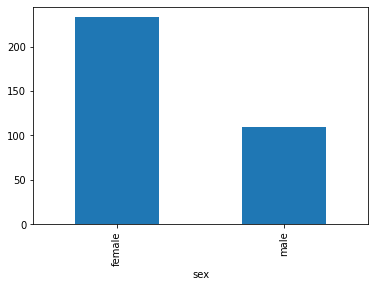

In [ ]:
df.groupby('sex')['survived'].sum().plot(kind='bar')

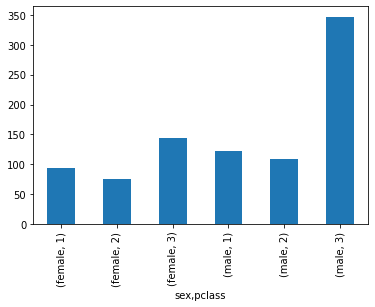

In [ ]:
df.groupby(['sex','pclass'])['pclass'].count().plot(kind='bar')

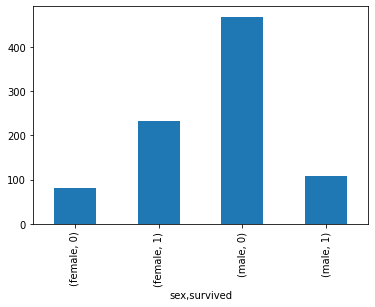

In [ ]:
gby = df.groupby(['sex','survived'])['survived'].count().plot(kind='bar')

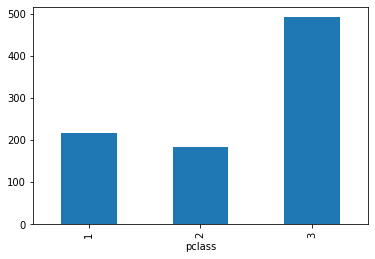

In [ ]:
df.groupby('pclass')['sex'].count().plot(kind='bar')

In [ ]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))


,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [ ]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)


In [ ]:
df1 = make_df('AB', [1,2])
df2 = make_df('AB', [3,4])
pd.concat([df1,df2], axis=1)

,A,B,A,B
1,A1,B1,NaN,NaN
2,A2,B2,NaN,NaN
3,NaN,NaN,A3,B3
4,NaN,NaN,A4,B4


In [ ]:
# two dfs same column same index and do concat with and without axis
# 2 dfs same column name diff index and concat with and without axis
# 2 dfs diff column name diff index and concat with and without axis

,A,B,A,B
1,A1,B1,A1,B1
2,A2,B2,A2,B2
